<a href="https://colab.research.google.com/github/h4r1c0t/WildCodeSchool/blob/master/Odyssey/Machine%20Learning/ML_challenge_Regressions_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [1]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a bien "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [2]:
# Your code here :
df_weather = df_main.merge(df_opinion, how = 'left', left_on = 'DATE', right_on = 'date').drop('date', axis = 1)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [3]:
df_weather['MONTH'] = df_weather['DATE'].apply(lambda x: x[5:7])
df_weather['DAY'] = df_weather['DATE'].apply(lambda x: x[-2:])
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,01,01
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,01,02
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,01,03
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,01,04
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,01,05


# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean"
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan"


In [4]:
# Your code here :
# train set
df_clean = df_weather.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 364
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    341 non-null    object 
 1   MAX_TEMPERATURE_C       341 non-null    int64  
 2   MIN_TEMPERATURE_C       341 non-null    int64  
 3   WINDSPEED_MAX_KMH       341 non-null    int64  
 4   TEMPERATURE_MORNING_C   341 non-null    int64  
 5   TEMPERATURE_NOON_C      341 non-null    int64  
 6   TEMPERATURE_EVENING_C   341 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     341 non-null    float64
 8   HUMIDITY_MAX_PERCENT    341 non-null    int64  
 9   VISIBILITY_AVG_KM       341 non-null    float64
 10  PRESSURE_MAX_MB         341 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  341 non-null    float64
 12  HEATINDEX_MAX_C         341 non-null    int64  
 13  DEWPOINT_MAX_C          341 non-null    int64  
 14  WINDTEMP_MAX_C          341 non-null    in

In [5]:
# test set
df_nan = df_weather[df_weather.isna().any(axis=1)]
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 18 to 349
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    24 non-null     object 
 1   MAX_TEMPERATURE_C       24 non-null     int64  
 2   MIN_TEMPERATURE_C       24 non-null     int64  
 3   WINDSPEED_MAX_KMH       24 non-null     int64  
 4   TEMPERATURE_MORNING_C   24 non-null     int64  
 5   TEMPERATURE_NOON_C      24 non-null     int64  
 6   TEMPERATURE_EVENING_C   24 non-null     int64  
 7   PRECIP_TOTAL_DAY_MM     24 non-null     float64
 8   HUMIDITY_MAX_PERCENT    24 non-null     int64  
 9   VISIBILITY_AVG_KM       24 non-null     float64
 10  PRESSURE_MAX_MB         24 non-null     int64  
 11  CLOUDCOVER_AVG_PERCENT  24 non-null     float64
 12  HEATINDEX_MAX_C         24 non-null     int64  
 13  DEWPOINT_MAX_C          24 non-null     int64  
 14  WINDTEMP_MAX_C          24 non-null     in

## Now, train your model
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).

Print the R2-score for the test set.

In [0]:
# Your code here
def best_LRmodel_training(data, y_column, X_columns):
  ''' Give the best model for multiple linear regression''' 
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression

  dico = {}

  # First step: loop to sort variables from best to worst explanation 
  for col in X_columns: 
    X = data[[col]]
    y = data[y_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
    LRmodel = LinearRegression().fit(X_train, y_train)
    score_train = LRmodel.score(X_train, y_train)
    dico[col] = score_train

  a = sorted(dico.items(), key=lambda t: t[1], reverse = True)

  var_list = []
  for i in range(len(a)):
    var_list.append(a[i][0]) 

  # Second step: loop to find the best model
  X_cols = []
  score_max_train = 0
  for var in var_list: 
    X_cols.append(var) 
    X = data[X_cols]
    y = data[y_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
    LRmodel = LinearRegression().fit(X_train, y_train)
    score_train = LRmodel.score(X_train, y_train)
    score_test = LRmodel.score(X_test, y_test)

    if round(abs(score_train), 2) > round(abs(score_max_train), 2):
      best_variables = X_cols
      score_max_train = score_train
      score_max_test = score_test

  print('\n LR model with the 2 best variables :\n - variables : {} \n - R2 train = {} \n - R2 test = {}'.format(best_variables, score_max_train, score_max_test))

  # Third step: repeat step 2?
  ''' On pourrait rajouter un tour où on teste la constance du model '''

  return LRmodel, best_variables

In [7]:
col_list = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'MONTH', 'DAY']

Best_LRmodel, col_to_keep = best_LRmodel_training(data = df_clean, y_column = 'SUNHOUR', X_columns = col_list)


 LR model with the 2 best variables :
 - variables : ['HEATINDEX_MAX_C', 'TEMPERATURE_NOON_C', 'CLOUDCOVER_AVG_PERCENT', 'MAX_TEMPERATURE_C', 'TEMPERATURE_EVENING_C', 'WINDTEMP_MAX_C', 'HUMIDITY_MAX_PERCENT', 'DEWPOINT_MAX_C', 'MIN_TEMPERATURE_C', 'TEMPERATURE_MORNING_C', 'WINDSPEED_MAX_KMH', 'PRECIP_TOTAL_DAY_MM', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'MONTH', 'DAY'] 
 - R2 train = 0.7704020300711326 
 - R2 test = 0.7211967449164736


## Predictions
Predict the sunhours values for your DF "df_nan".

In [8]:
# Your code here :
X = df_nan[col_to_keep]

# Prediction
df_nan['SUNHOUR'] = Best_LRmodel.predict(X)

# Flag
df_nan['FLAG'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df_clean['FLAG'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.

In [10]:
# Your code here
df2018complete = pd.concat([df_clean, df_nan], axis = 0)
df2018complete.sort_values(by = ['MONTH', 'DAY'], axis = 0, inplace = True)
df2018complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


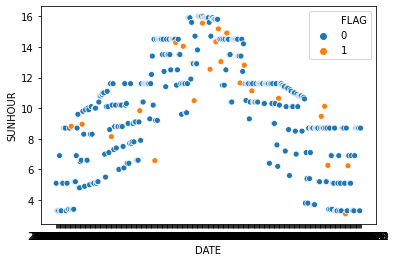

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot('DATE', 'SUNHOUR', data = df2018complete, hue = 'FLAG')
plt.show()